In [81]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\HP\\Downloads\\cereals.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.ndim)
print(df.shape)


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  
2
(74, 16)


In [82]:
newdf = df.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(newdf.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8      -1        25   

      rating  
0  68.402973  
1  33.983679  
2  59.425505  
3  93.704912  
4  34.384843  


In [83]:
# X = feature values, all the columns except the last column
X = newdf.iloc[:, [0,1,4,6]]
# y = target values, last column of the data frame
y = newdf.iloc[:, -1]
X.head()


,calories,protein,fiber,sugars
0,70,4,10.0,6
1,120,3,2.0,8
2,70,4,9.0,5
3,50,4,14.0,0
4,110,2,1.0,8


In [84]:
split = int(0.8*len(newdf))
X_train, X_test, Y_train, Y_test = X[:split], X[split:], y[:split], y[split:]

import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [85]:
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [86]:
reg.score(X, y)

0.8576570757842814

In [88]:
newpred = reg.predict(X_test)
#type(newpred)
xyz = pd.DataFrame(newpred)

In [54]:
xyz.head()

,0
0,41.673169
1,58.714363
2,60.203765
3,58.268430
4,26.485806


In [90]:
df_new = pd.concat([X_test, Y_test], axis=1)

df_new



,calories,protein,fiber,sugars,rating
59,110,2,0.0,3,40.560159
60,80,2,3.0,0,68.235885
61,90,3,4.0,0,74.472949
62,90,3,3.0,0,72.801787
63,110,2,1.0,15,31.230054
64,110,6,1.0,3,53.131324
65,90,2,3.0,5,59.363993
66,110,2,0.0,3,38.839746
67,140,3,4.0,14,28.592785
68,100,3,3.0,3,46.658844


In [94]:
# Original Rating, Predict Rating
df_new['pred_rating'] = newpred
df_new
#df_new2 = pd.concat([X_test, xyz], axis=1)
#df_new2

,calories,protein,fiber,sugars,rating,pred_rating
59,110,2,0.0,3,40.560159,41.673169
60,80,2,3.0,0,68.235885,58.714363
61,90,3,4.0,0,74.472949,60.203765
62,90,3,3.0,0,72.801787,58.268430
63,110,2,1.0,15,31.230054,26.485806
64,110,6,1.0,3,53.131324,51.097456
65,90,2,3.0,5,59.363993,49.261734
66,110,2,0.0,3,38.839746,41.673169
67,140,3,4.0,14,28.592785,28.636429
68,100,3,3.0,3,46.658844,51.669584


In [95]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-0.2318171   1.87223793  1.93533543 -1.42689155]


In [97]:
print('Coefficients: \n', reg.score(X,y))

Coefficients: 
 0.8576570757842814


In [110]:
#len(X_test)
#len(Y_test)
#Y_test.shape
X_test.head()

,calories,protein,fiber,sugars
59,110,2,0.0,3
60,80,2,3.0,0
61,90,3,4.0,0
62,90,3,3.0,0
63,110,2,1.0,15


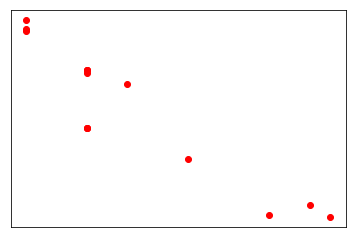

In [123]:
# Plot outputs
plt.scatter(X_test.iloc[:,3], newpred,  color='red')
#plt.plot(X_test.iloc[:,3], newpred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [128]:
data = newdf
data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,34.384843


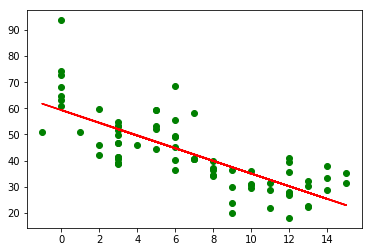

In [133]:

X = data.iloc[:, 6].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 9].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y, color='green')
plt.plot(X, Y_pred, color='red')
plt.show()